# Set up notebook

In [1]:
import warnings
warnings.filterwarnings('ignore')
import h5py
from IPython.display import Image
%config InlineBackend.figure_format = 'retina'

# Access data
The posterior data is stored as flattened arrays in the `samples` group of the hdf files in this repository. The parameter names for each of the arrays that exist in a file can be accessed through a `variable_args` attribute of the file:

In [2]:
fp = h5py.File("gw_only_posteriors.hdf", "r")
print fp.attrs['variable_args']
fp.close()

['tc' 'ra' 'dec' 'mass1' 'mass2' 'coa_phase' 'inclination' 'polarization'
 'distance' 'spin1z' 'spin2z']


Each of these parameter names can then be used to access that parameter's data in the `samples` group of the file. For example, the inclination angle posterior samples (in radians) from our run using the GW signal as well as EM sky location and Gaussian distance prior can be accessed this way:

In [3]:
fp = h5py.File("gw_skyloc_and_dist_posteriors.hdf", "r")
inc_samples = fp['samples/inclination'][:]
fp.close()
print inc_samples

[2.74223087 2.58393159 2.49176962 ... 2.53901635 2.61125559 2.45446383]


By default, the PyCBC software used to create these files stores the mass parameters only as `mass1` and `mass2`, but other mass parameters like chirp mass and mass ratio can be derived from these. For example, using the PyCBC toolkit:

In [4]:
from pycbc import pnutils
import numpy as np

fp = h5py.File("gw_and_skyloc_posteriors.hdf", "r")
mass1 = fp['samples/mass1'][:]
mass2 = fp['samples/mass2'][:]
fp.close()

mchirp = np.array([pnutils.mass1_mass2_to_mchirp_eta(m1, m2)[0] for m1, m2 in zip(mass1, mass2)])
q = np.array([m1/m2 for m1, m2 in zip(mass1, mass2)])

print mchirp
print q

[1.19741915 1.19764339 1.19745038 ... 1.19744863 1.1974772  1.19743338]
[1.09369018 1.76305928 1.35133021 ... 1.35989104 1.26977907 1.07243915]


# Make Figure 1 plot
For Figure 1, we use a built-in PyCBC plotting script that handles formatting and any necessary parameter conversions. Below is an example that will plot the posteriors in the way they're shown in the figure. Some formatting differences may be present, but if you're running a development version of PyCBC then you can adjust these to your taste in the plotting code.

/home/daniel.finstad/opt/pycbc-dev2/lib/python2.7/site-packages/h5py-2.7.1-py2.7-linux-x86_64.egg/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2018-04-12 08:12:03,589 Loading parameters
2018-04-12 08:12:03,589 Reading input file gw_only_posteriors.hdf
2018-04-12 08:12:03,590 Loading samples
2018-04-12 08:12:03,625 Reading input file gw_and_skyloc_posteriors.hdf
2018-04-12 08:12:03,625 Loading samples
2018-04-12 08:12:03,658 Reading input file gw_skyloc_and_dist_posteriors.hdf
2018-04-12 08:12:03,659 Loading samples
2018-04-12 08:12:03,699 Plotting
/home/daniel.finstad/opt/pycbc-dev2/lib/python2.7/site-packages/matplotlib-2.1.2-py2.7-linux-x86_64.egg/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results mi

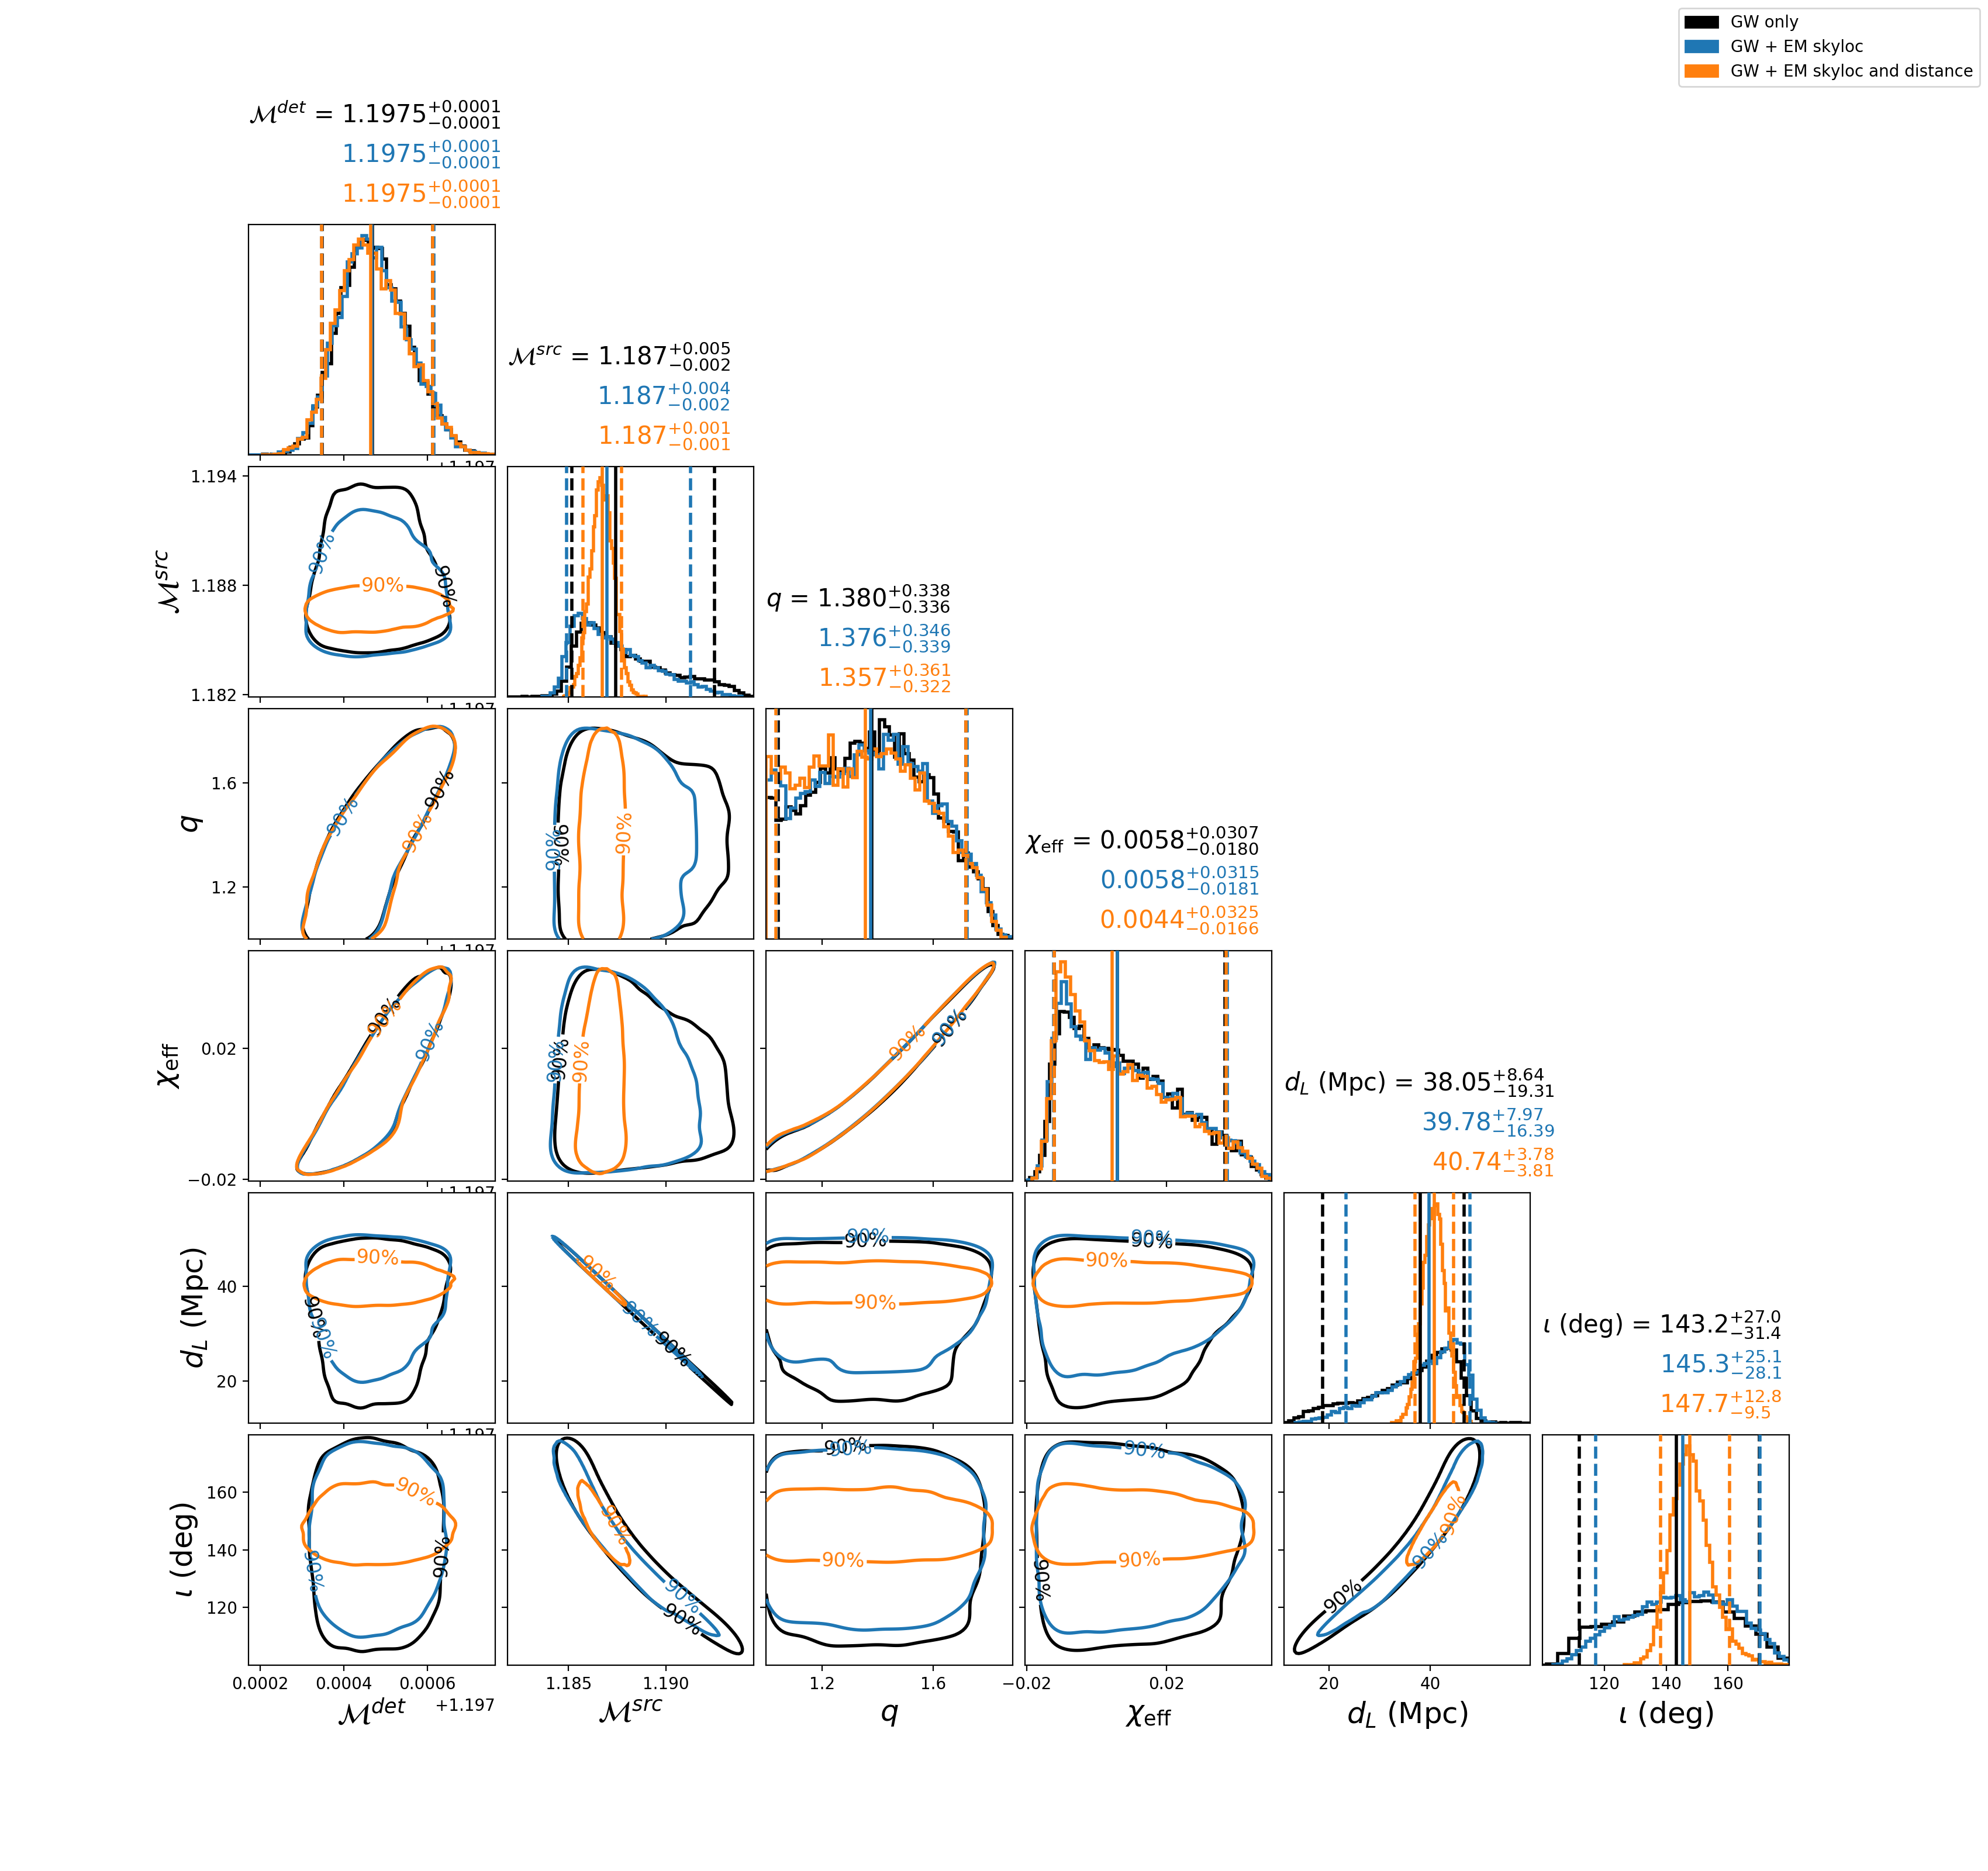

In [5]:
!pycbc_inference_plot_posterior --input-file gw_only_posteriors.hdf \
                                             gw_and_skyloc_posteriors.hdf \
                                             gw_skyloc_and_dist_posteriors.hdf \
                                --input-file-labels "GW only" "GW + EM skyloc" "GW + EM skyloc and distance" \
                                --output-file posterior_plot.png \
                                --plot-marginal --plot-contours --contour-percentiles 90 \
                                --parameters 'mchirp:$\mathcal{M}^{det}$' \
                                             'mchirp/(1+redshift):$\mathcal{M}^{src}$' \
                                              q chi_eff distance \
                                              'inclination*180/pi:$\iota$ (deg)' \
                                --mins 'inclination*180/pi':100 \
                                --verbose
                                
Image('posterior_plot.png')